# Predicting Vehicle Prices with Advanced Machine Learning Techniques

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load the data into Pandas DataFrame

In [9]:
# Import dataset into pandas dataframe
df = pd.read_csv("vehicles_dataset.csv")

In [7]:
# Displaying first 5 rows in the dataset
df.head()

,name,description,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,New,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,New,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,New,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,New,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,New,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


# Explore the dataset

In [15]:
# Number of rows and columns
df.shape

(1002, 18)

In [12]:
# Checking the datatype of atrributes in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   type            1002 non-null   object 
 5   year            1002 non-null   int64  
 6   price           978 non-null    float64
 7   engine          1000 non-null   object 
 8   cylinders       897 non-null    float64
 9   fuel            995 non-null    object 
 10  mileage         968 non-null    float64
 11  transmission    1000 non-null   object 
 12  trim            1001 non-null   object 
 13  body            999 non-null    object 
 14  doors           995 non-null    float64
 15  exterior_color  997 non-null    object 
 16  interior_color  964 non-null    object 
 17  drivetrain      1002 non-null   o

In [13]:
# Summarizing descripitive statistics of all attributes in the dataset
df.describe()

,year,price,cylinders,mileage,doors
count,1002.000000,978.000000,897.000000,968.000000,995.000000
mean,2023.916168,50254.317996,4.975474,69.033058,3.943719
std,0.298109,18640.823226,1.392526,507.435745,0.274409
min,2023.000000,17994.000000,0.000000,0.000000,2.000000
25%,2024.000000,36633.500000,4.000000,4.000000,4.000000
50%,2024.000000,47170.000000,4.000000,8.000000,4.000000
75%,2024.000000,58924.750000,6.000000,13.000000,4.000000
max,2025.000000,195895.000000,8.000000,9711.000000,5.000000


In [17]:
# Checking for missing values in the dataset
df.isnull().sum()

name                0
description        56
make                0
model               0
type                0
year                0
price              24
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64

In [21]:
# Fill 'price' and 'mileage' with the median value
df['price'].fillna(df['price'].median())
df['mileage'].fillna(df['mileage'].median())

0       10.0
1        1.0
2        0.0
3       32.0
4       10.0
        ... 
997     10.0
998      0.0
999     20.0
1000     6.0
1001    31.0
Name: mileage, Length: 1002, dtype: float64

In [25]:
# Fill other columns with the mode or a placeholder as appropriate
mode_fill_cols = ['engine', 'fuel', 'transmission', 'body', 'doors', 'exterior_color', 'interior_color']
for col in mode_fill_cols:
    df[col].fillna(df[col].mode()[0])
df['cylinders'].fillna(df['cylinders'].mode()[0])

0       6.0
1       6.0
2       8.0
3       8.0
4       6.0
       ... 
997     4.0
998     4.0
999     6.0
1000    6.0
1001    8.0
Name: cylinders, Length: 1002, dtype: float64

# Exploratory Data Analysis

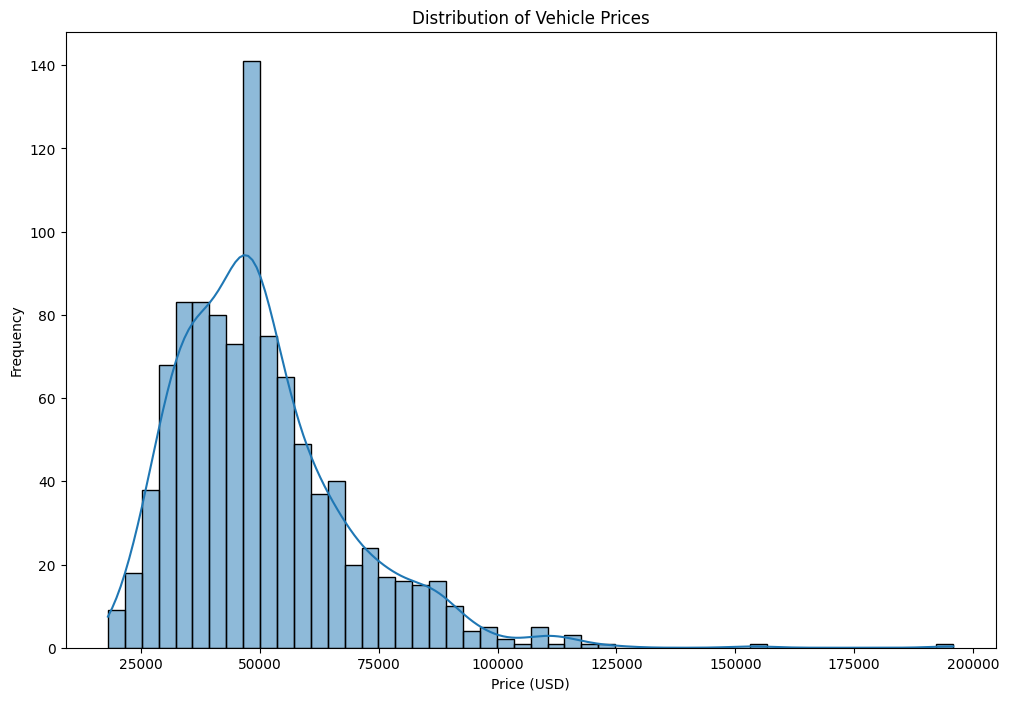

In [33]:
# Visualize the distribution of vehicle price
plt.figure(figsize=(12, 8))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

#### From the above visualization we can see that maximum number of vehicles fall between $$25000 - $70000 USD 

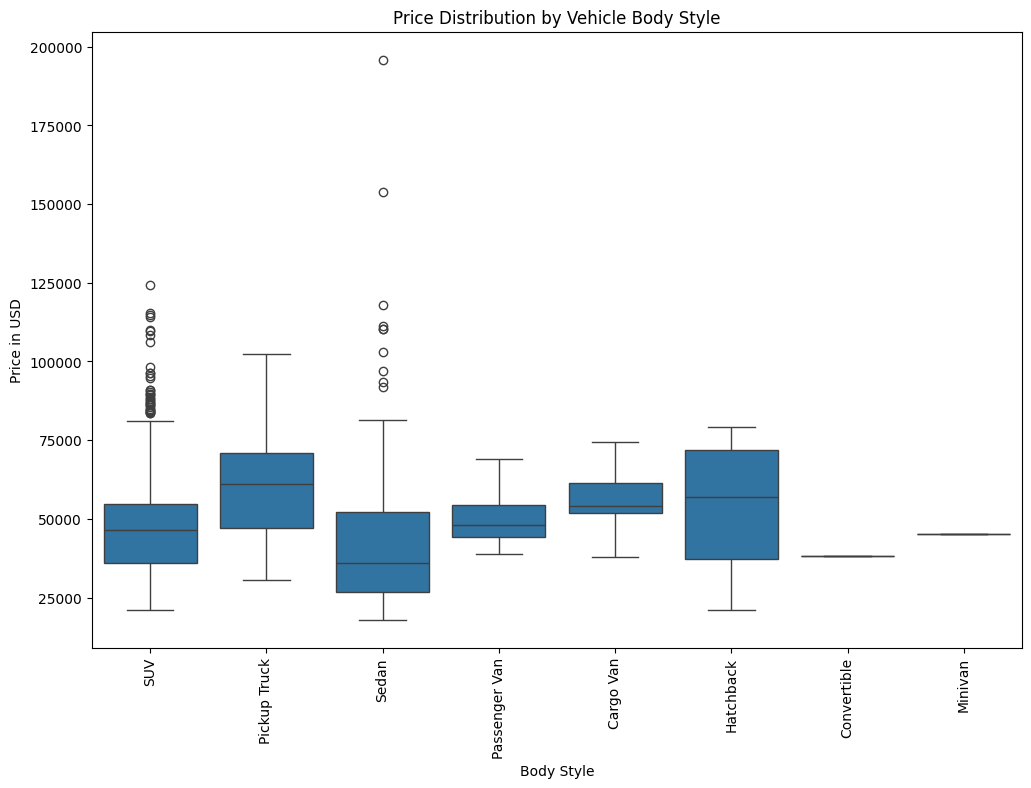

In [42]:
# Distribuion of Vehicle price and Body style
plt.figure(figsize=(12, 8))
sns.boxplot(x='body', y='price', data=df)
plt.title('Price Distribution by Vehicle Body Style')
plt.xlabel('Body Style')
plt.ylabel('Price in USD')
plt.xticks(rotation=90)
plt.show()

#### From the above boxplot we can see that Pickup Truck and Hatchback are more expensive as compared to SUV and Sedan

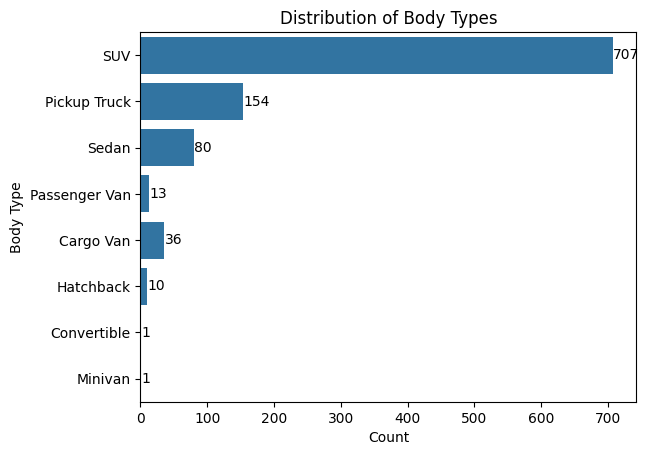

In [39]:
# Analysing count of different types of cars manufactured 
ax = sns.countplot(data=df, y='body')
for label in ax.containers:
    ax.bar_label(label)
plt.title('Distribution of Body Types')
plt.xlabel('Count')
plt.ylabel('Body Type')
plt.show()

#### SUV have highest number of production followed by Pickup Truck

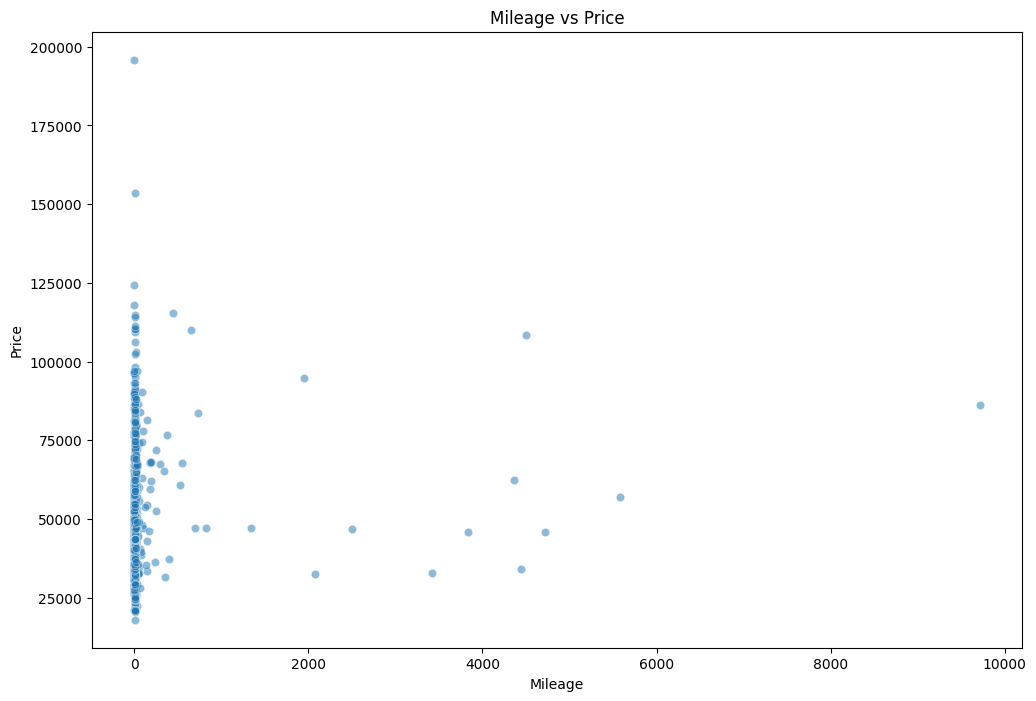

In [41]:
# Scatter plot for mileage vs. price
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='mileage', y='price', alpha=0.5)
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

#### The range of Mileage of vehicle is constant but there is an increase in the amount of Price of vehicles

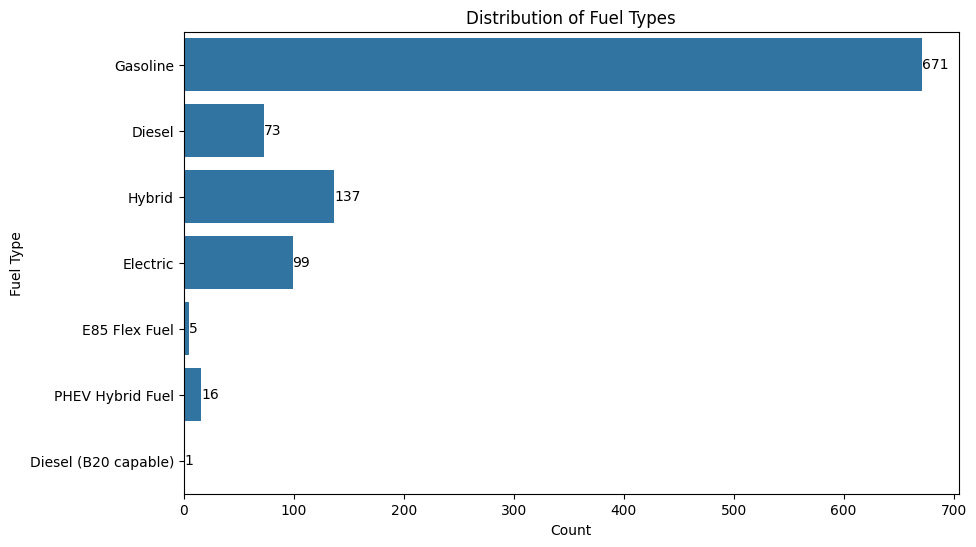

In [43]:
# Analyzing the distribution of Fuel types
plt.figure(figsize=(10, 6))
bx = sns.countplot(y='fuel', data=df)
for label in bx.containers:
    bx.bar_label(label)
plt.title('Distribution of Fuel Types')
plt.xlabel('Count')
plt.ylabel('Fuel Type')
plt.show()

#### Gasoline fuel type has the highest amount of production followed by Hybrid and Electric

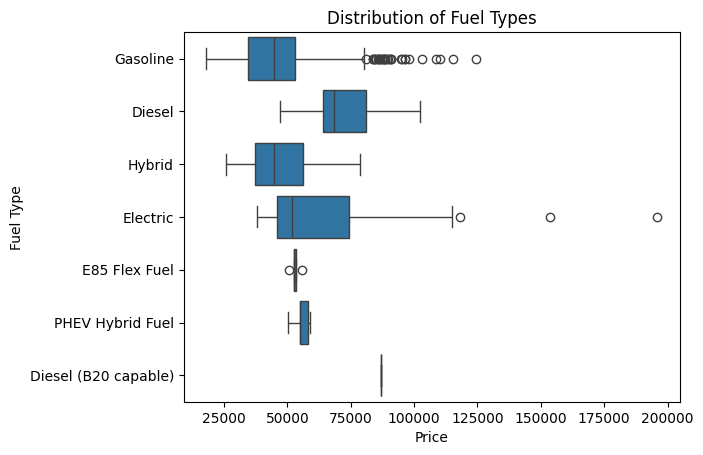

In [48]:
# Analysing distribution of fuel type and price of vehicle
sns.boxplot(data=df, y='fuel', x='price')
plt.title('Distribution of Fuel Types')
plt.xlabel('Price')
plt.ylabel('Fuel Type')
plt.show()

#### Vehicles having fuel type Diesel are more expensive as compared to vehicles with Gasoline

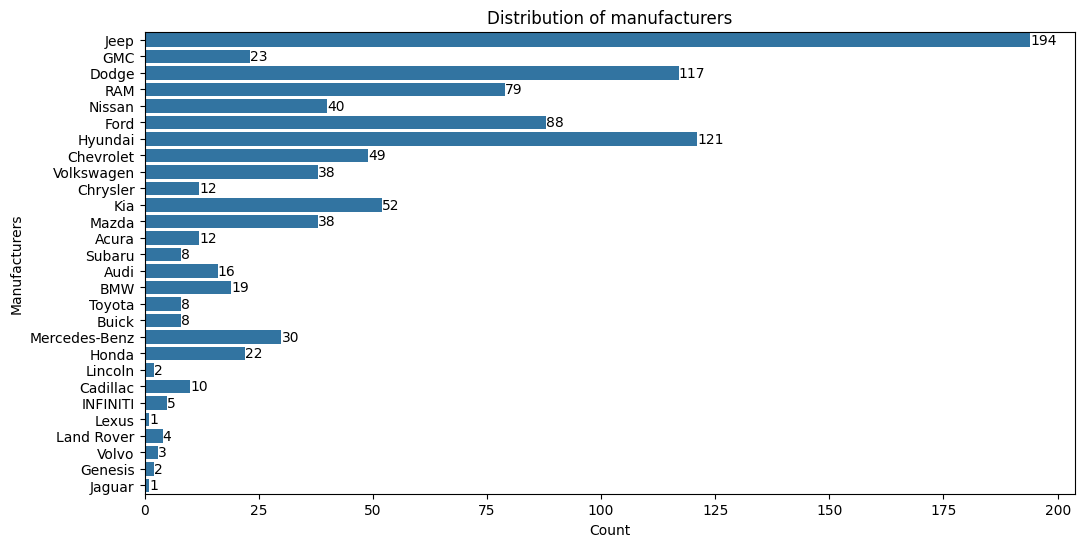

In [49]:
# Analyzing the distribution of manufacturers
plt.figure(figsize=(12, 6))
cx = sns.countplot(data=df, y='make')
for label in cx.containers:
    cx.bar_label(label)
plt.title('Distribution of manufacturers')
plt.xlabel('Count')
plt.ylabel('Manufacturers')
plt.show()

#### Jeep has more production followed by Hyundai and Dodge whereas the least being Jaguar, Lexus, Genesis and Lincoln

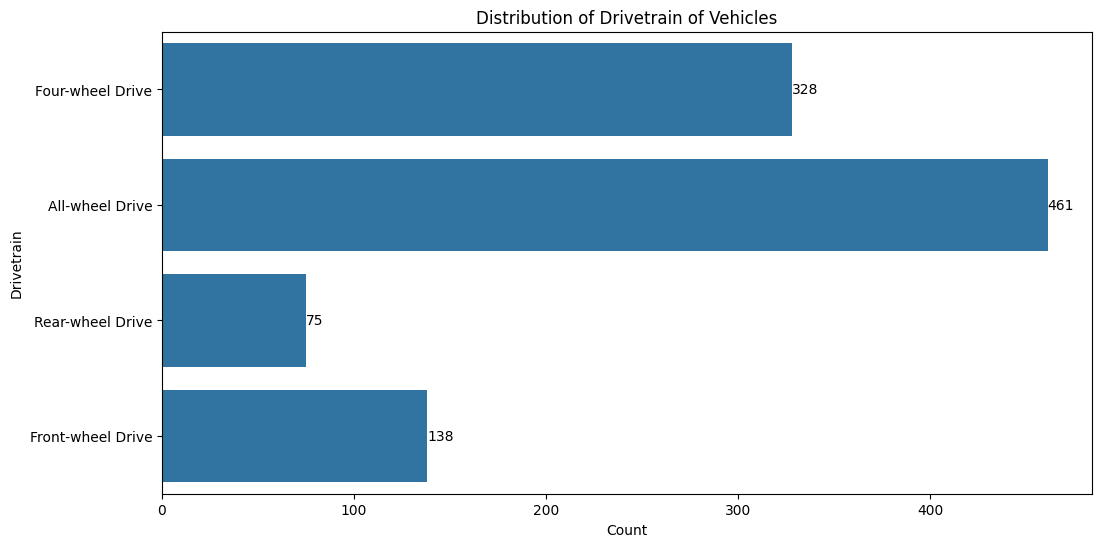

In [51]:
# Analyzing the distribution of drivetrain of vehicles
plt.figure(figsize=(12, 6))
dx = sns.countplot(data=df, y='drivetrain')
for label in dx.containers:
    dx.bar_label(label)
plt.title('Distribution of Drivetrain of Vehicles')
plt.xlabel('Count')
plt.ylabel('Drivetrain')
plt.show()

#### All-wheel Drive has the highest production and the least being rear-wheel Drive

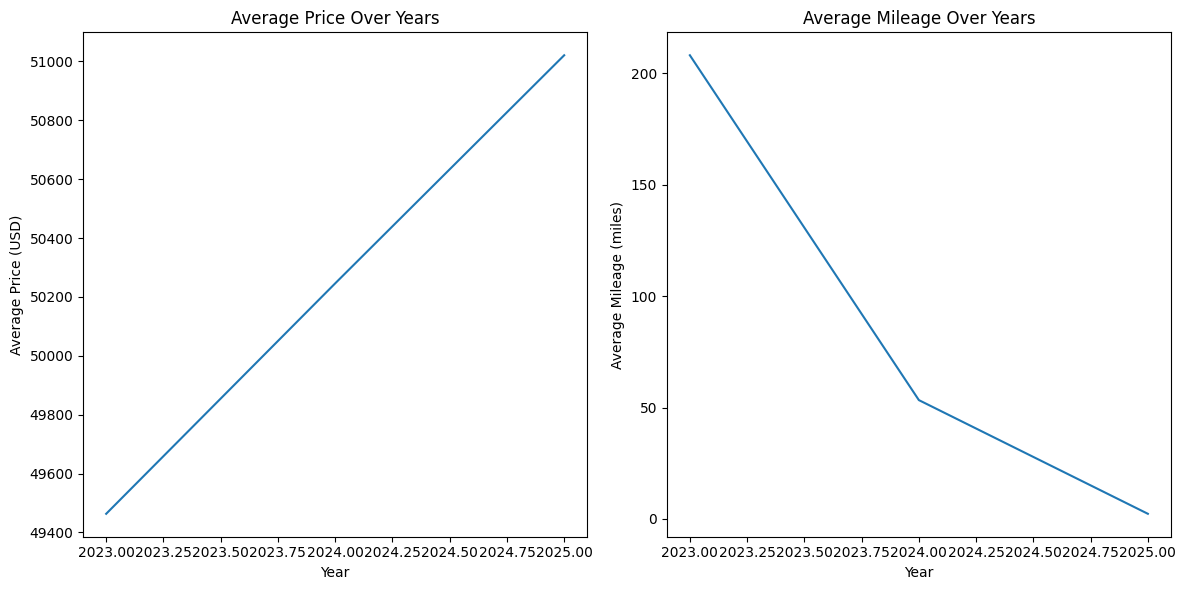

In [52]:
# Plotting graph of Average Price over the years and Average Mileage over the years
plt.figure(figsize=(12, 6))
avg_price_year = df.groupby('year')['price'].mean()
avg_mileage_year = df.groupby('year')['mileage'].mean()

plt.subplot(1, 2, 1)
avg_price_year.plot(kind='line')
plt.title('Average Price Over Years')
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')

plt.subplot(1, 2, 2)
avg_mileage_year.plot(kind='line')
plt.title('Average Mileage Over Years')
plt.xlabel('Year')
plt.ylabel('Average Mileage (miles)')

plt.tight_layout()
plt.show()

#### There is a linear relationship between average price and year of production, whereas we see a negative relationship betweeen average mileage and year of production

# Feature Engineering

In [53]:
# Example: Extracting the brand from the name
df['brand'] = df['name'].apply(lambda x: x.split(' ')[0])

# Convert categorical features to numerical using one-hot encoding
categorical_features = ['make', 'model', 'fuel', 'transmission', 'body', 'exterior_color', 'interior_color', 'drivetrain', 'brand']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Dropping irrelevant features from the dataset
df.drop(['name','description','type', 'engine', 'doors', 'trim'], axis=1, inplace=True)

# Feature Selection

In [56]:
# Separate target and features
X = df.drop('price', axis=1)
y = df['price']

# Select the top 10 features
selector = SelectKBest(f_regression, k=10)
selector.fit(X, y)
X_new = selector.transform(X)

# Display selected features
selected_features = X.columns[selector.get_support()]
print(selected_features)

Index(['cylinders', 'make_BMW', 'make_Mercedes-Benz', 'make_RAM', 'model_3500',
       'model_i7', 'fuel_Gasoline', 'interior_color_Caramel',
       'drivetrain_Four-wheel Drive', 'drivetrain_Front-wheel Drive'],
      dtype='object')


# Model Selection and Training

In [57]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100)
}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - MSE: {mse}, R2: {r2}')

Linear Regression - MSE: 153466390.97400206, R2: 0.3979410260550055
Decision Tree - MSE: 125442098.43207423, R2: 0.5078822106117316
Random Forest - MSE: 125581104.73733224, R2: 0.5073368795266362


## Interpretation of the Results

### Linear Regression - R²: 0.398

The Linear Regression model has the highest MSE and the lowest R² among the three models. This indicates that it has the largest average squared error in predictions and explains around 39.8% of the variance in the price data.

### Decision Tree - R²: 0.507

The Decision Tree model has a lower MSE compared to Linear Regression, indicating it makes more accurate predictions on average. Its R² value of 0.507 means it explains about 50.7% of the variance in the price data.

### Random Forest - R²: 0.504

The Random Forest model has a slightly higher MSE than the Decision Tree but significantly lower than Linear Regression. Its R² value of 0.504 indicates it explains about 50.4% of the variance in the price data. Despite being slightly less accurate than the Decision Tree in this case, Random Forests often generalize better and can handle more complex patterns.

### Decision Tree appears to be the best model in terms of MSE and R², indicating it provides the most accurate predictions and explains the highest proportion of variance in the price data.

# Model Evaluation

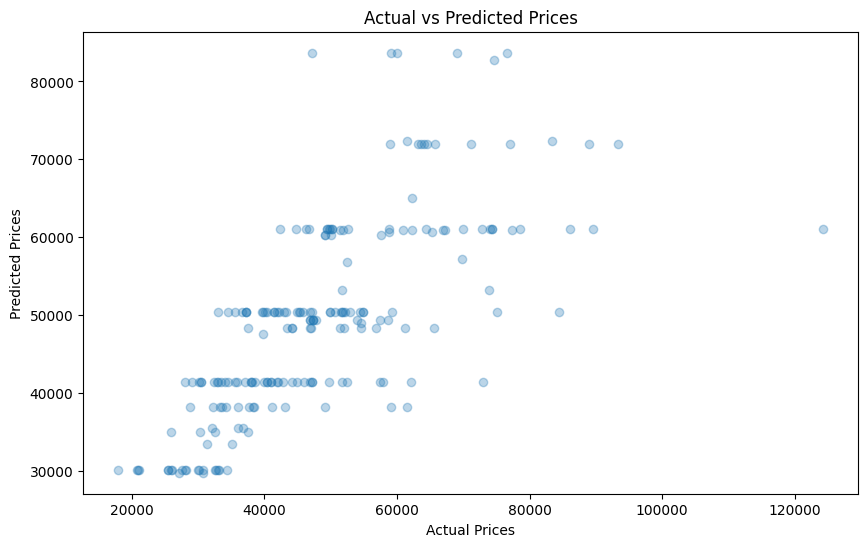

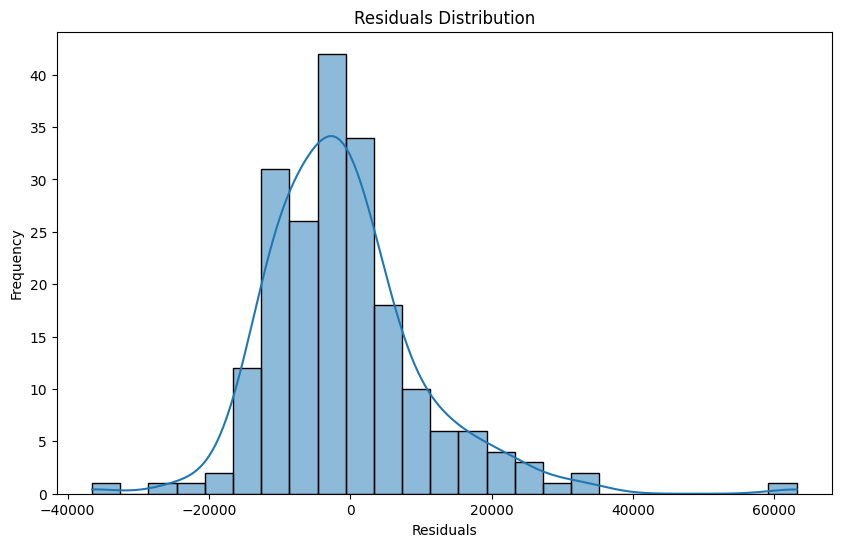

In [60]:
# Plotting actual vs predicted prices for the best model (e.g., Random Forest)
best_model = models['Random Forest']
y_pred = best_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


# Model Tuning

### Hyperparameter Tuning for Decision Tree and Random Forest

In [61]:
# Decision Tree hyperparameters
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Random Forest hyperparameters
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search for Decision Tree
dt_grid_search = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=dt_param_grid, cv=3, n_jobs=-1, verbose=2)
dt_grid_search.fit(X_train, y_train)

# Grid search for Random Forest
rf_grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=rf_param_grid, cv=3, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)

# Best parameters and scores
print("Decision Tree Best Parameters:", dt_grid_search.best_params_)
print("Decision Tree Best Score:", dt_grid_search.best_score_)
print("Random Forest Best Parameters:", rf_grid_search.best_params_)
print("Random Forest Best Score:", rf_grid_search.best_score_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Decision Tree Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Decision Tree Best Score: 0.5463394334078848
Random Forest Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest Best Score: 0.5469824738467763


# Model Validation

### Used Cross-validation to ensure model generalizes well

In [62]:
# Best parameters for Decision Tree and Random Forest
dt_best_params = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
rf_best_params = {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}

# Retrain Decision Tree
best_dt_model = DecisionTreeRegressor(**dt_best_params)
best_dt_model.fit(X_train, y_train)

# Retrain Random Forest
best_rf_model = RandomForestRegressor(**rf_best_params)
best_rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=30, min_samples_split=10)

In [63]:
# Predictions
dt_y_pred = best_dt_model.predict(X_test)
rf_y_pred = best_rf_model.predict(X_test)

# Evaluation metrics for Decision Tree
dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)
print(f'Tuned Decision Tree - MSE: {dt_mse}, R2: {dt_r2}')

# Evaluation metrics for Random Forest
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
print(f'Tuned Random Forest - MSE: {rf_mse}, R2: {rf_r2}')

Tuned Decision Tree - MSE: 125802101.93637136, R2: 0.5064698926505276
Tuned Random Forest - MSE: 126332342.24162471, R2: 0.50438972426904
